# libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.image as img
import seaborn as sns
sns.set_style('darkgrid')
import PIL.Image as Image
import cv2
import itertools
import random
import pathlib
import os
import splitfolders
import tensorflow as tf
import keras
from sklearn.metrics import classification_report , confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import imagenet_utils
from sklearn.model_selection import train_test_split
import pickle
import warnings
warnings.filterwarnings('ignore')

# import Dataset

In [3]:
root_path = r'C:\Users\Shubham1999\Rice_Image_Dataset'
root_path = pathlib.Path (root_path)

# Use splitfolders to create 3 folders named: Train, Test, Validation

In [4]:
splitfolders.ratio(root_path, output='Images', seed=123, ratio=(.7,.15,.15), group_prefix=None)

Copying files: 75000 files [10:23, 120.32 files/s]


In [5]:
arborio = [fn for fn in os.listdir(f'{root_path}/Arborio') if fn.endswith('.jpg')]
bastmati = [fn for fn in os.listdir(f'{root_path}/Basmati') if fn.endswith('.jpg')]
ipsala = [fn for fn in os.listdir(f'{root_path}/Ipsala') if fn.endswith('.jpg')]
jasmine = [fn for fn in os.listdir(f'{root_path}/Jasmine') if fn.endswith('.jpg')]
karacadag = [fn for fn in os.listdir(f'{root_path}/Karacadag') if fn.endswith('.jpg')]
rice = [arborio, bastmati, ipsala, jasmine, karacadag]

In [6]:
rice_classes = []
for i in os.listdir('Images/train'):
    rice_classes+=[i]
rice_classes.sort()
rice_classes

['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

In [7]:
image_count = len(list(root_path.glob('*/*.jpg')))
print(f'Total images: {image_count}')
print(f'Total number of classes: {len(rice_classes)}')
count = 0
rice_count = []
for x in rice_classes:
    print(f'Total {x} images: {len(rice[count])}')
    rice_count.append(len(rice[count]))
    count += 1

Total images: 75000
Total number of classes: 5
Total Arborio images: 15000
Total Basmati images: 15000
Total Ipsala images: 15000
Total Jasmine images: 15000
Total Karacadag images: 15000


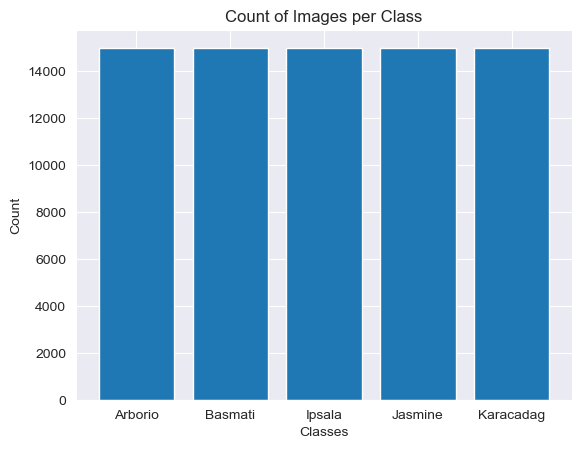

In [8]:
plt.bar(rice_classes, rice_count)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Count of Images per Class')
plt.show()

Image dimensions: (250, 250, 3)


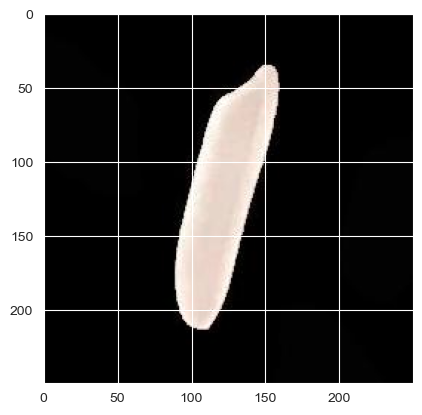

In [9]:
sample_img = cv2.imread(r'C:\Users\Shubham1999\Rice\Basmati\Basmati (1).jpg')
plt.imshow(sample_img)
print(f'Image dimensions: {sample_img.shape}')

You can test by each name of photos like this: r'C:\Users\Shubham1999\Rice\Basmati\Basmati (1).jpg'

# See each types of rice classes by 2 solution:

# 1:

In [10]:
def load_random_img(dir,label):
    plt.figure(figsize=(10,10))
    i=0
    for label in rice_classes:
        i+=1
        plt.subplot(1,5,i)
        file=random.choice(os.listdir(f'{dir}/{label}'))
        image_path=os.path.join(f'{dir}/{label}',file)
        img=cv2.imread(image_path)
        plt.title(label)
        plt.imshow(img)
        plt.grid(None)
        plt.axis('off')

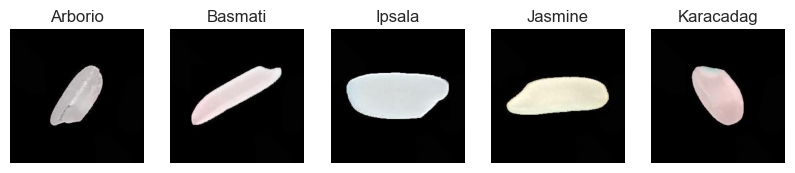

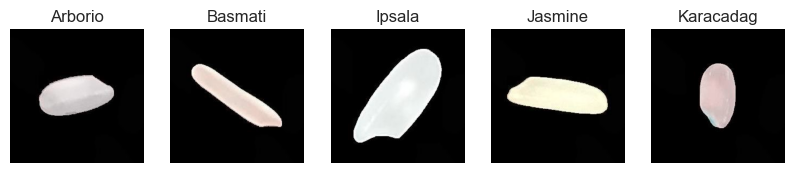

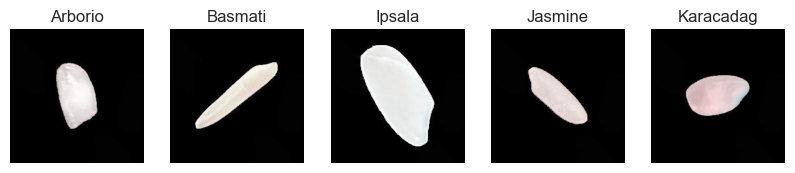

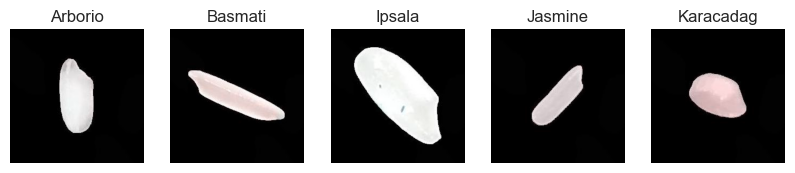

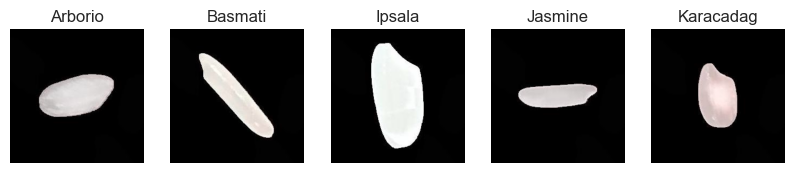

In [11]:
for i in range(5):
    load_random_img(root_path,rice_classes)

# 2:

In [12]:
arborio = list(root_path.glob('Arborio/*'))[:1000]
basmati = list(root_path.glob('Basmati/*'))[:1000]
ipsala = list(root_path.glob('Ipsala/*'))[:1000]
jasmine = list(root_path.glob('Jasmine/*'))[:1000]
karacadag = list(root_path.glob('Karacadag/*'))[:1000]

In [13]:
data = {'arborio':arborio, 'basmati':basmati, 'ipsala':ipsala, 'jasmine':jasmine, 'karacadag':karacadag}

rice_labels= {0:"Arborio", 1:"Basmati", 2:"Ipsala", 3:"Jasmine", 4:"Karacadag"}

In [14]:
def load_random_img(dir, label):
    plt.figure(figsize=(10,10))
    i=0
    for label in rice_classes:
        i+=1
    plt.subplot(1, 5, i)
    file = random.choice(os.listdir(f'{dir}/{label}'))
    image_path = os.path.join(f'{dir}/{label}', file)
    img=cv2.imread(image_path)
    plt.title(label)
    plt.imshow(img)
    plt.grid(None)
    plt.axis('off')

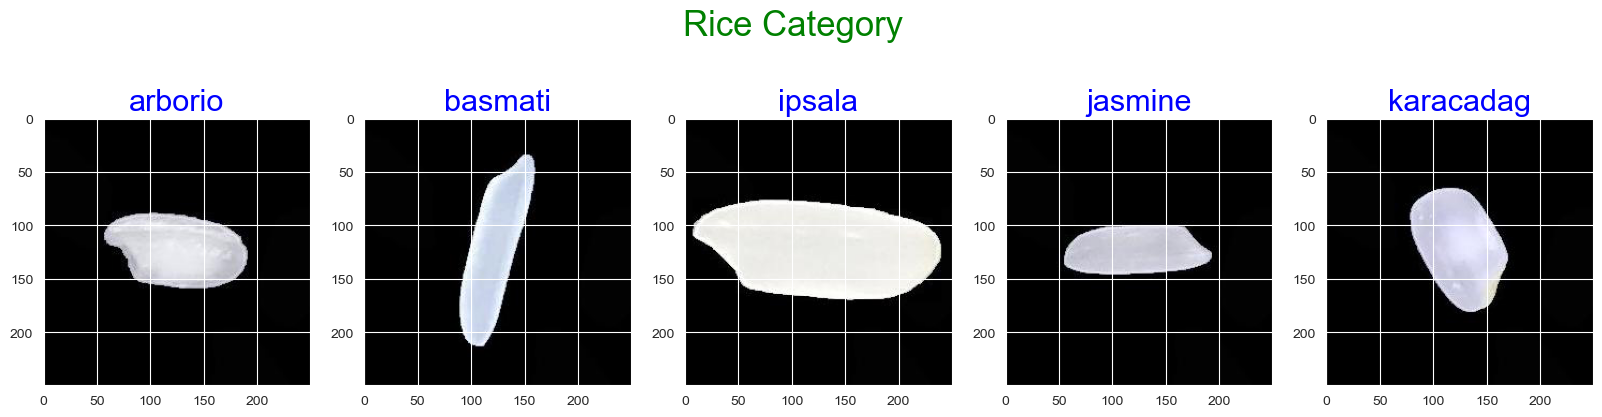

In [15]:
fig, ax = plt.subplots(ncols=5, figsize=(20,5))
fig.suptitle('Rice Category' , color='green',fontsize=25)
arborio_image = img.imread(arborio[0])
basmati_image = img.imread(basmati[0])
ipsala_image = img.imread(ipsala[0])
jasmine_image = img.imread(jasmine[0])
karacadag_image = img.imread(karacadag[0])

ax[0].set_title('arborio', fontsize=22, color='blue')
ax[1].set_title('basmati', fontsize=22, color='blue')
ax[2].set_title('ipsala', fontsize=22, color='blue')
ax[3].set_title('jasmine', fontsize=22, color='blue')
ax[4].set_title('karacadag', fontsize=22, color='blue')


ax[0].imshow(arborio_image)
ax[1].imshow(basmati_image)
ax[2].imshow(ipsala_image)
ax[3].imshow(jasmine_image)
ax[4].imshow(karacadag_image)

# Processing the Data 

In [16]:
batch_size = 128
img_height, img_width = 256, 256
input_shape = (img_height, img_width, 3)

In [17]:
datagen = ImageDataGenerator(rescale=1./255)

In [18]:
Train = datagen.flow_from_directory(
    'Images/train',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    subset = "training",
    class_mode='categorical')

Val = datagen.flow_from_directory(
    'Images/val',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Test = datagen.flow_from_directory(
    'Images/test',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    class_mode='categorical',
    shuffle=False)

Found 52500 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.
Found 11250 images belonging to 5 classes.


created by splitfolders

# Create the CNN model:

In [19]:
CNN = tf.keras.models.Sequential()

# Convolution
CNN.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[256,256,3]))

#Pooling
CNN.add(tf.keras.layers.MaxPool2D(pool_size=2, strides =2))

# Add another convolutional layer
CNN.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))

# Add another max pooling layer
CNN.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


#Flattening
CNN.add(tf.keras.layers.Flatten())

#Full Conection
CNN.add(tf.keras.layers.Dense(units=512, activation='relu'))

#Hidden layer
CNN.add(tf.keras.layers.Dense(units=256, activation='relu'))

#Output layer
CNN.add(tf.keras.layers.Dense(units=5, activation='softmax'))

In [22]:
CNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 512)               1

In [23]:
CNN.compile(optimizer='adam', loss='categorical_crossentropy' , metrics=['accuracy'])

In [1]:
Model = CNN.fit(x=Train, validation_data=Val, epochs=1)

In [ ]:
CNN.summary()

In [ ]:
pickle.dump(CNN, open('model.pkl', 'wb'))

# Accuracy:

In [ ]:
score = CNN.evaluate(Test, verbose=1)
print(f'Model Loss: {score[0]}, Accuracy: {score[1]*100}')

In [ ]:
root_path = r'C:\Users\Shubham1999\Rice_Image_Dataset'
class_names = sorted(os.listdir(root_path))
class_names

In [ ]:
del class_names[5]

print(class_names)

In [ ]:
Y_pred = CNN.predict(Test)
y_pred = np.argmax(Y_pred, axis=1) #Max prob between 5 values
confusion_mtx = confusion_matrix(y_pred, Test.classes)
f,ax = plt.subplots(figsize=(6, 6))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,
            linecolor="white", 
            fmt= '.1f',ax=ax, cmap=plt.cm.Accent_r)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [ ]:
report = classification_report(Test.classes, y_pred, target_names=class_names, output_dict=True)
DF_evaluation = pd.DataFrame(report).transpose()
DF_evaluation.style.apply(highlight_max)

# Test the model by 3 Soloution:

# 1:

In [ ]:
plt.figure(figsize=(10, 10))
#The next function returns a batch from the dataset. The return value is in form of (training features and labels)
x, label= Train.next()  
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.imshow(x[i])
    result = np.where(label[i]==1)
    predict = CNN(tf.expand_dims(x[i], 0))
    score = tf.nn.softmax(predict[0])
    score_label = class_names[np.argmax(score)]
    plt.title(f'Truth: {class_names[result[0][0]]}\nPrediction:{score_label}')
    plt.axis(False)

# 2:

In [ ]:
image_path = r'C:\Users\Shubham1999\Rice_Image_Dataset\Basmati\Basmati (1).jpg'
target_size = (256, 256)

# Load the image
Second_Way_Test = tf.keras.utils.load_img(image_path, target_size=target_size)

# Extract the filename from the image path
image_filename = os.path.basename(image_path)

# Display the image
plt.imshow(Second_Way_Test)
plt.title(image_filename , color = 'green')
plt.axis('off')
plt.show()

# 3:

In [ ]:
image_path = r'C:\Users\Shubham1999\Rice_Image_Dataset\Basmati\Basmat (1).jpg'
target_size = (256, 256)
Second_Way_Test = tf.keras.utils.load_img(image_path, target_size=target_size)

# Convert image to array
Third_Way_Test = tf.keras.utils.img_to_array(Second_Way_Test)
Third_Way_Test = np.expand_dims(Third_Way_Test, axis=0)

# Perform prediction
Result = CNN.predict(Third_Way_Test)

# Define class labels
class_labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']

# Get the predicted class index
predicted_class_index = np.argmax(Result)

# Get the predicted class label
predicted_class_label = class_labels[predicted_class_index]

# Print the predicted class label and result
print("Predicted Class: ", predicted_class_label)
print("Prediction Result: ", Result)